In [1]:
import pandas as pd

csv_path = 'csv_data_hate/hateful_cleaned.csv'
df_hateful = pd.read_csv(csv_path, index_col=False)
csv_path = 'csv_data_general/general_cleaned.csv'
df_general = pd.read_csv(csv_path, index_col=False)

In [2]:
df_all = df_hateful.append(df_general, ignore_index=True)

In [3]:
df_all.to_csv('all_cleaned.csv', index=False)

df_test = df_all[:100]
df_test.to_csv('test_cleaned.csv', index=False)

In [1]:
import pandas as pd

csv_path = 'all_cleaned.csv'
df_csv = pd.read_csv(csv_path, index_col=False)

In [2]:
def remove_dup(obj_str):
    li = obj_str.split(',')
    li = list(set(li))
    return ','.join(li)

In [3]:
df_csv['yolo'] = df_csv['yolo'].apply(remove_dup)
df_csv.to_csv('all_cleaned.csv', index=False)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from operator import itemgetter

In [5]:
csv_path = 'all_cleaned.csv'
df_csv = pd.read_csv(csv_path, index_col=False)

In [13]:
df_csv = df_csv.loc[df_csv['topic'].isin(['ageism'])]

In [3]:
obj_dict = {}

def count_objs(obj_str):
    li = obj_str.split(',')
    for item in li:
        if item in obj_dict:
            obj_dict[item] += 1
        else:
            obj_dict[item] = 1

df_csv['yolo'].apply(count_objs)

0         None
1         None
2         None
3         None
4         None
          ... 
114059    None
114060    None
114061    None
114062    None
114063    None
Name: yolo, Length: 114064, dtype: object

In [4]:
N = 10
top_dict = dict(sorted(obj_dict.items(), key = itemgetter(1), reverse = True)[:N])

In [5]:
len_all = len(df_csv.index)
top_dict_per = {}

for key, val in top_dict.items():
    top_dict_per[key] = val / len_all

In [25]:
df_top_per = pd.DataFrame(top_dict_per.items(), columns=['Object', 'Percentage'])
csv_path = 'plot_data/yolo_top_all.csv'
df_top_per.to_csv(csv_path, index=False)

In [5]:
csv_path = 'plot_data/yolo_top_all.csv'
df_top_per = pd.read_csv(csv_path, index_col=False)

In [38]:
sns.set_theme()
sns.set_context('paper')
sns.set_style('whitegrid')

plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

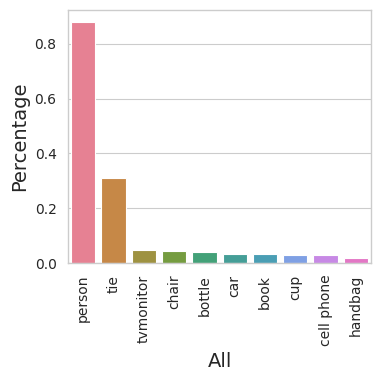

In [44]:
plt.figure(figsize=(4,4), tight_layout=True)
# plt.bar(df_top_per.Object, df_top_per.Percentage, width=0.7)
plt.xticks(rotation='vertical')
sns.barplot(data=df_top_per, x='Object', y='Percentage', palette=sns.color_palette('husl', 10))
plt.xlabel('All')

plt.show()